## Business Problem:
Yulu is India's leading micro-mobility service provider, offering shared electric bicycles for daily commutes. The company has recently experienced revenue declines and needs data-driven insights to understand demand patterns. As a data scientist, you have been provided with historical bike rental data spanning 2011-2012. Your task is to analyze this data and identify the key factors that drive bike sharing demand.

Objectives:
Identify which variables are significant in predicting demand
Quantify how well these variables explain demand patterns
Provide actionable insights for business strategy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp # 1 sample t test
from scipy.stats import ttest_ind # Takes data as input and returns stat and p
from scipy.stats import ttest_ind_from_stats # Takes sample means, std, n and returns stat and p

In [2]:
# reading from the csv file
df=pd.read_csv('bike_sharing.csv')

In [3]:
# first 5 rows from the dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# last 5 rows of the dataset
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
# a random sample of 3 from the dataset
df.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
728,2011-02-13 17:00:00,1,0,0,1,17.22,21.21,28,22.0028,30,95,125
2990,2011-07-13 12:00:00,3,0,1,1,34.44,37.88,41,19.0012,40,134,174
3359,2011-08-09 21:00:00,3,0,1,1,31.98,34.85,46,16.9979,46,184,230


In [6]:
# total rows and columns of the dataset
df.shape

(10886, 12)

In [7]:
# datatype info, non-null count and also memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# summary statistics
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# data types of all the columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
# converting the existing data types to appropriate datatypes

In [11]:
# converting the datatime column which is a string object to datatime object
df['datetime']=pd.to_datetime(df['datetime'])

In [12]:
# converting some of the columns into category datatype

In [13]:
df['season']=df['season'].astype('category')

In [14]:
df['holiday']=df['holiday'].astype('category')

In [15]:
df['workingday']=df['workingday'].astype('category')

In [16]:
df['weather']=df['weather'].astype('category')

In [17]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [18]:
## Missing value detection

In [19]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [20]:
df.isna().sum(axis=1).sum()

np.int64(0)

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
# Outlier detection

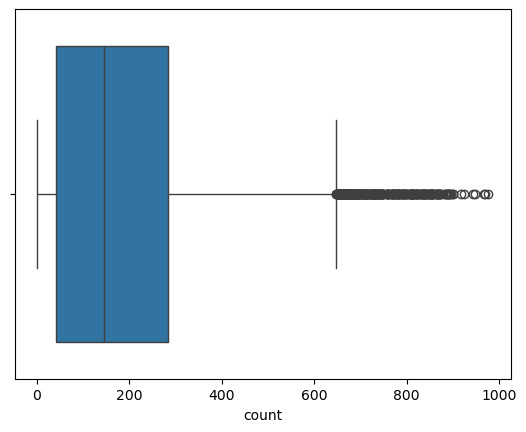

In [23]:
sns.boxplot(x='count',data=df)
plt.show()

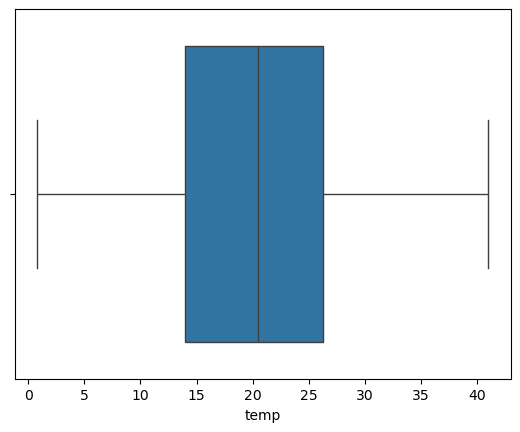

In [24]:
sns.boxplot(x='temp',data=df)
plt.show()

In [25]:
ws=df['windspeed'].describe()

In [26]:
ws_iqr=ws['75%']-ws['25%']

In [27]:
ws_iqr

np.float64(9.996400000000001)

In [28]:
upper=ws['75%']+(1.5*ws_iqr)
upper

np.float64(31.992500000000003)

In [29]:
df[df['windspeed']>upper].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55


In [30]:
df[df['windspeed']>upper]['count'].sum()

np.int64(43661)

In [31]:
df[df['windspeed']<=upper]['count'].sum()

np.int64(2041815)

In [32]:
# Outlier windspeed affects the total count of bikes rented

In [33]:
#

In [34]:
hum=df['humidity'].describe()

In [35]:
hum

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [36]:
hum_iqr=hum['75%']-hum['25%']

In [37]:
hum_iqr

np.float64(30.0)

In [38]:
upper=hum['75%']+(1.5*hum_iqr)

In [39]:
lower=hum['25%']-(1.5*hum_iqr)
lower

np.float64(2.0)

In [40]:
upper

np.float64(122.0)

In [41]:
df[df['humidity']>upper]['count'].sum()

np.int64(0)

In [42]:
df[df['humidity']<upper]['count'].sum()

np.int64(2085476)

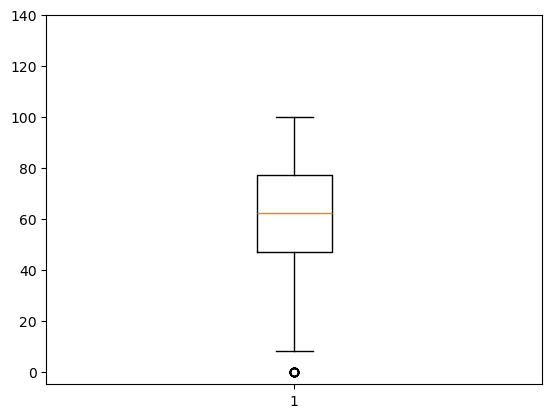

In [43]:
plt.boxplot(df['humidity'])
plt.yticks(range(0,150,20))
plt.show()

In [44]:
# No outliers found for humidity

In [45]:
#

In [46]:
temp=df['temp'].describe()
temp

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [47]:
temp_iqr=temp['75%']-temp['25%']

In [48]:
temp_iqr

np.float64(12.299999999999999)

In [49]:
upper=temp['75%']+(1.5*temp_iqr)
upper

np.float64(44.69)

In [50]:
df[df['temp']>upper]['count'].sum()

np.int64(0)

In [51]:
df[df['temp']<upper]['count'].sum()

np.int64(2085476)

In [52]:
# no outliers found for temperatures

In [53]:
# value counts

In [54]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
# value counts of season
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [56]:
# value counts of holidays
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [57]:
# value counts of holidays
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [58]:
# value counts of weather
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [59]:
##

## Visual Analysis - Univariate & Bivariate


In [60]:
# categorical variables: Box plots

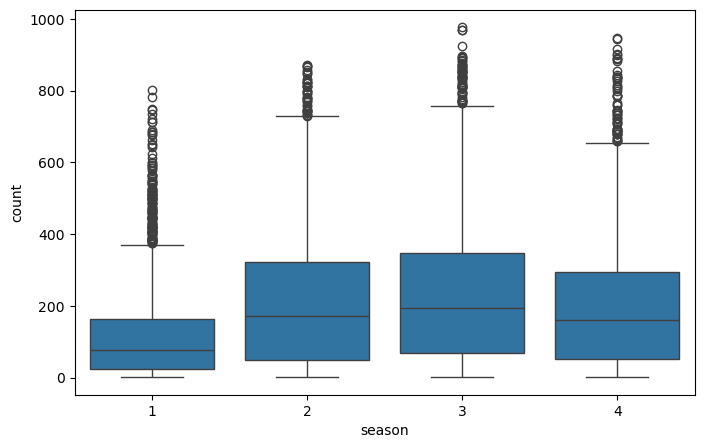

In [61]:
# seasons box plots
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
g=sns.boxplot(x='season',y='count',data=df)
plt.show()

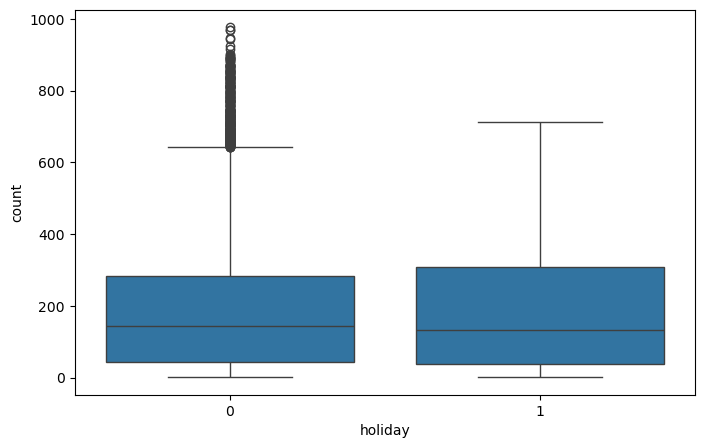

In [62]:
# holiday boxplots
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
g=sns.boxplot(x='holiday',y='count',data=df)
plt.show()

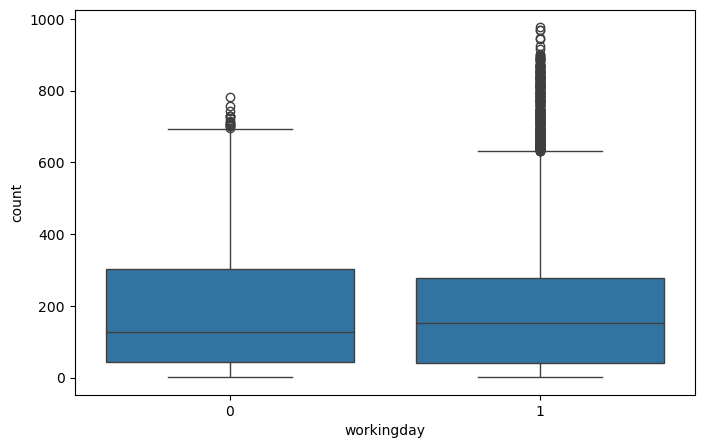

In [63]:
# workingday box plots
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
g=sns.boxplot(x='workingday',y='count',data=df)
plt.show()

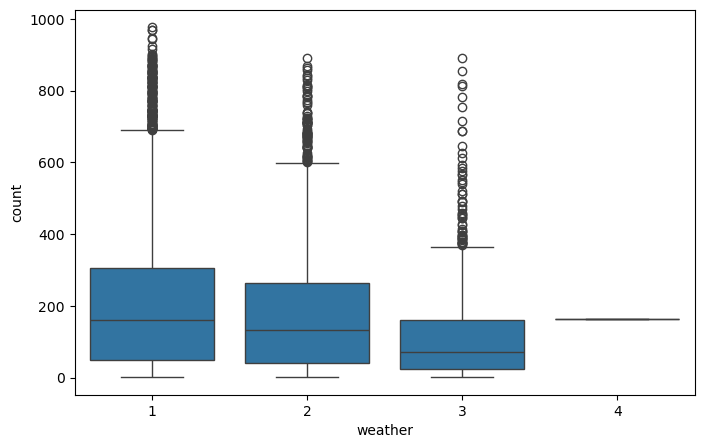

In [64]:
# weather box plots
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
g=sns.boxplot(x='weather',y='count',data=df)
plt.show()

In [65]:
# Distribution of plots of all the continuous variables

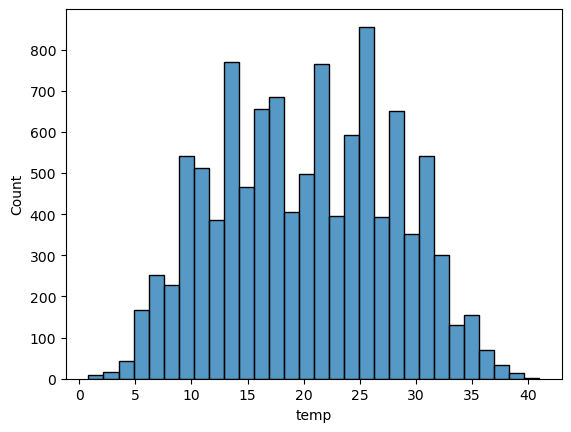

In [66]:
sns.histplot(df['temp'],bins=30)
plt.show()

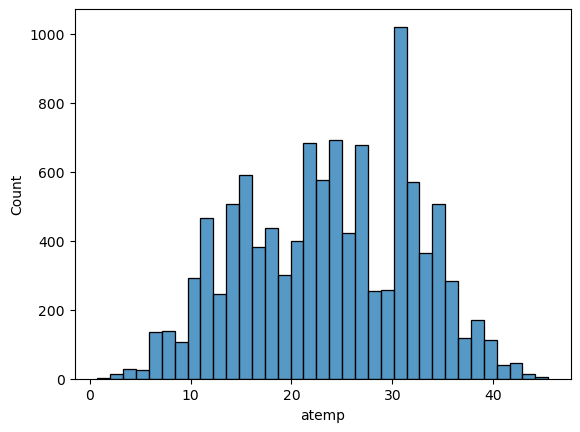

In [67]:
sns.histplot(df['atemp'])
plt.show()

In [68]:
# barplot/count plot for all categorical variables

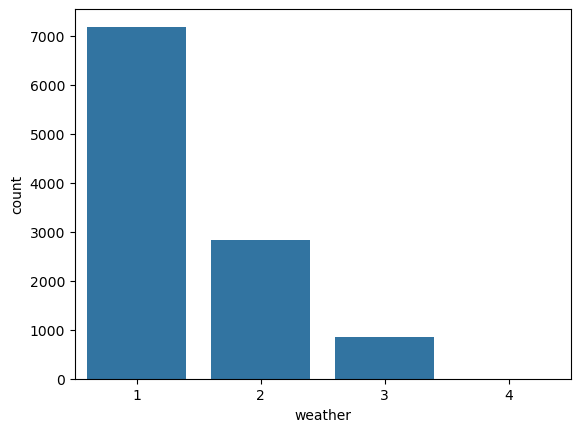

In [69]:
sns.countplot(x='weather',data=df);

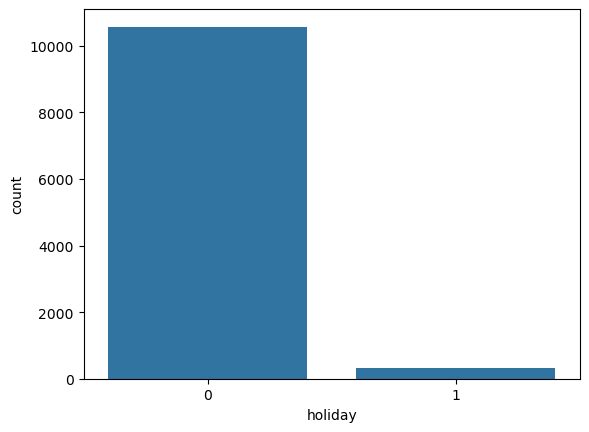

In [70]:
sns.countplot(x='holiday',data=df);

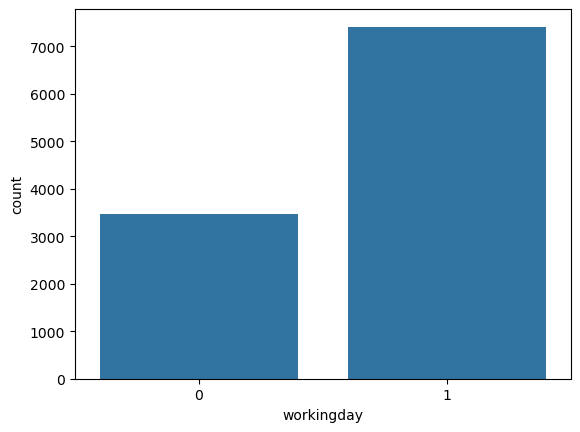

In [71]:
sns.countplot(x='workingday',data=df);

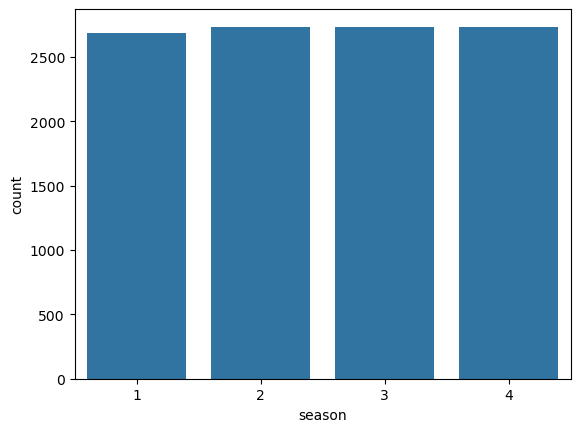

In [72]:
sns.countplot(x='season',data=df);

## Bivariate Analysis

In [73]:
# Relationship showing the distribution between working days for different seasons

<Axes: xlabel='workingday', ylabel='count'>

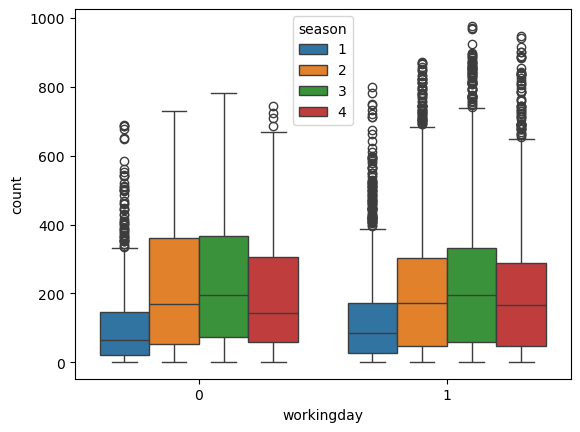

In [74]:
sns.boxplot(x ='workingday', y ='count', data = df, hue ='season')

In [75]:
# Relationship showing the distribution between working days for different weather

<Axes: xlabel='workingday', ylabel='count'>

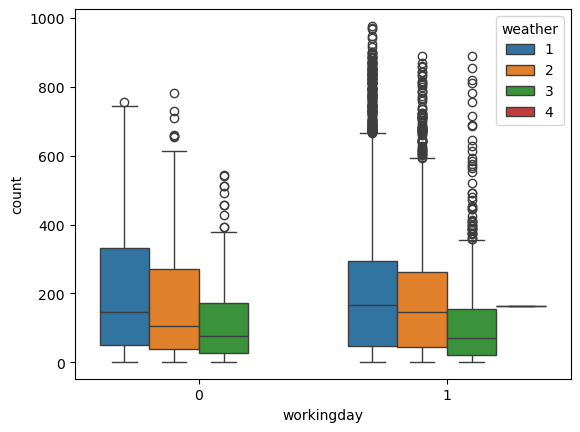

In [76]:
sns.boxplot(x ='workingday', y ='count', data = df, hue ='weather')

In [77]:
# relationship between workday and count

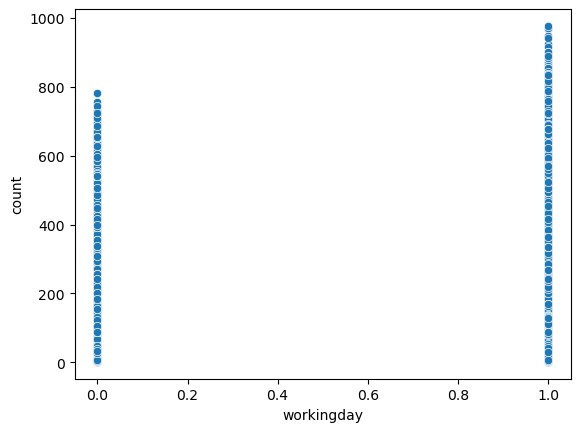

In [78]:
sns.scatterplot(x='workingday',y='count',data=df)
plt.show()

In [79]:
# relationship between season and count

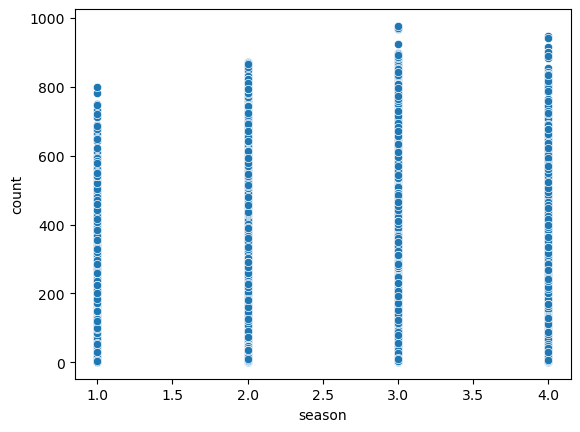

In [80]:
sns.scatterplot(x='season',y='count',data=df)
plt.show()

In [81]:
# relationship between weather and count

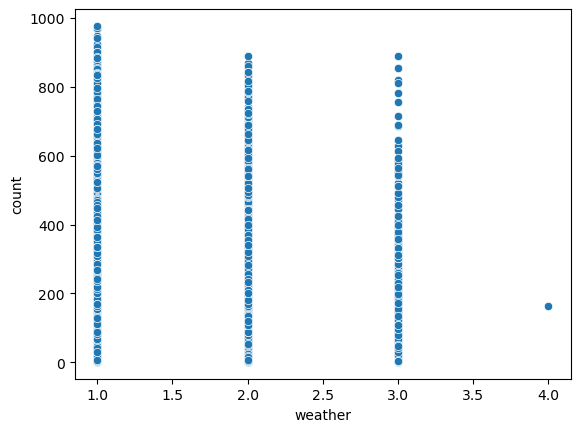

In [82]:
sns.scatterplot(x='weather',y='count',data=df)
plt.show()

In [83]:
# relationship between temp and count

<Axes: xlabel='temp', ylabel='count'>

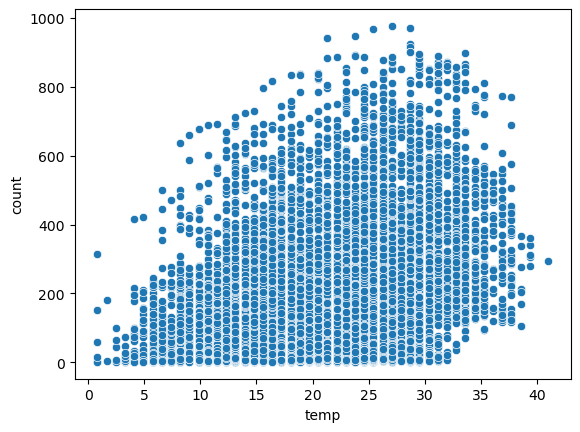

In [84]:

sns.scatterplot(x='temp',y='count',data=df)

In [85]:
# relationship between windspeed and count

<Axes: xlabel='windspeed', ylabel='count'>

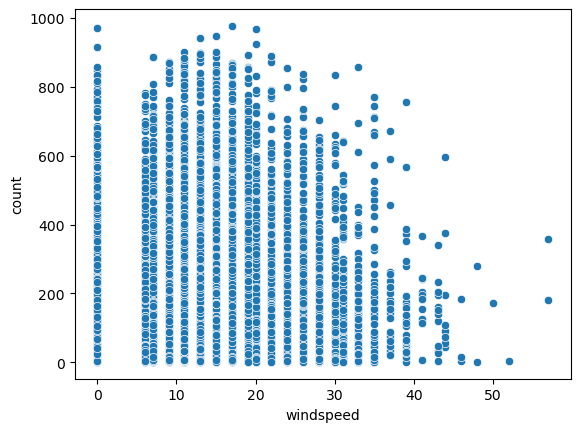

In [86]:
sns.scatterplot(x='windspeed',y='count',data=df)

In [87]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [88]:
# Heatmaps

In [89]:
cross=pd.crosstab(df['workingday'],df['weather'])
cross

weather,1,2,3,4
workingday,,,,
0,2353,897,224,0
1,4839,1937,635,1


<Axes: xlabel='weather', ylabel='workingday'>

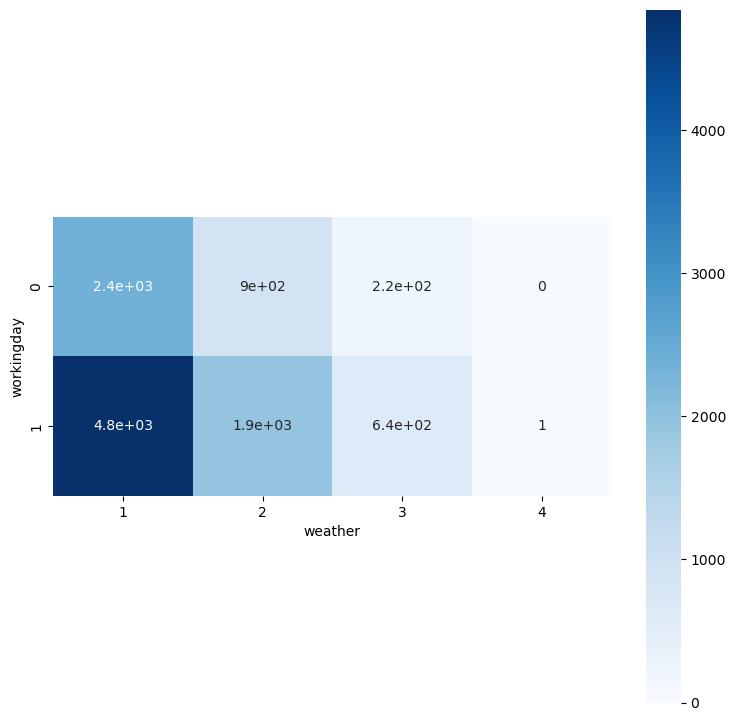

In [90]:
plt.figure(figsize=(9, 9))
sns.heatmap(cross, square=True,annot=True, cmap="Blues")

In [91]:
cross=pd.crosstab(df['season'],df['weather'])
cross

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


<Axes: xlabel='weather', ylabel='season'>

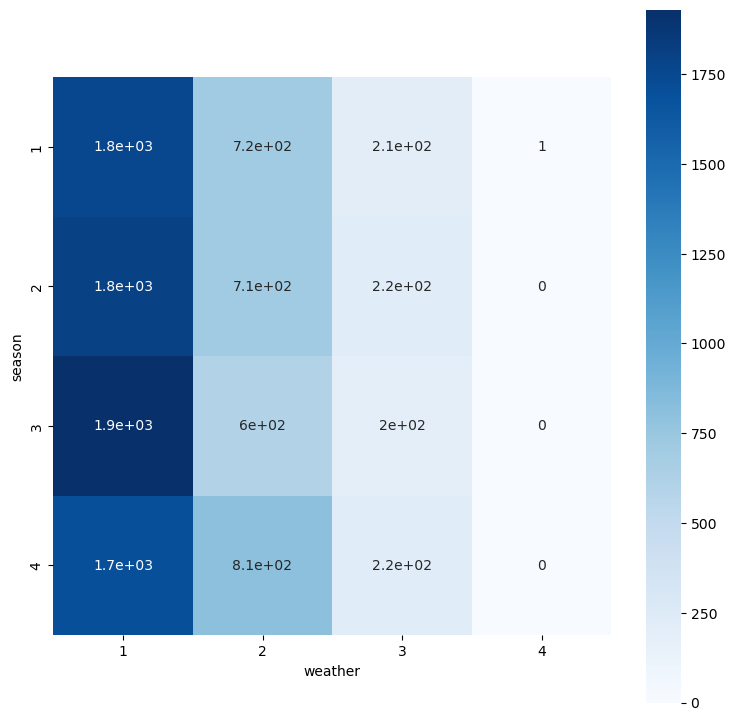

In [92]:
plt.figure(figsize=(9, 9))
sns.heatmap(cross, square=True,annot=True, cmap="Blues")

In [93]:
#

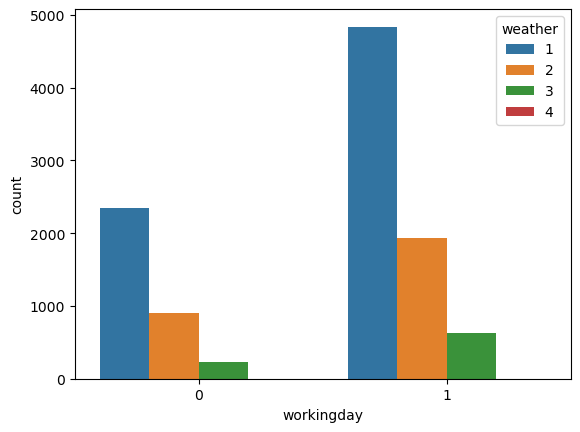

In [94]:
sns.countplot(x='workingday',data=df,hue='weather');

In [95]:
#

In [96]:
# Hypothesis Testing section

In [97]:
#1 Chi-square test:


In [98]:
# Test: Check if weather is dependent on the season

In [99]:
# Set the null and alternate hypothesis
#H0: Weather and Season are independent
#H1: Weather and Season are dependent

In [100]:
# Set the significance level
alpha=0.05

In [101]:
# create a contingency table
cont=pd.crosstab(index=df["weather"], columns=df["season"])
cont

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [102]:
#stats.probplot(df['count'], dist="norm", plot=plt)

In [103]:
# Visual analysis by heatmap

<Axes: xlabel='season', ylabel='weather'>

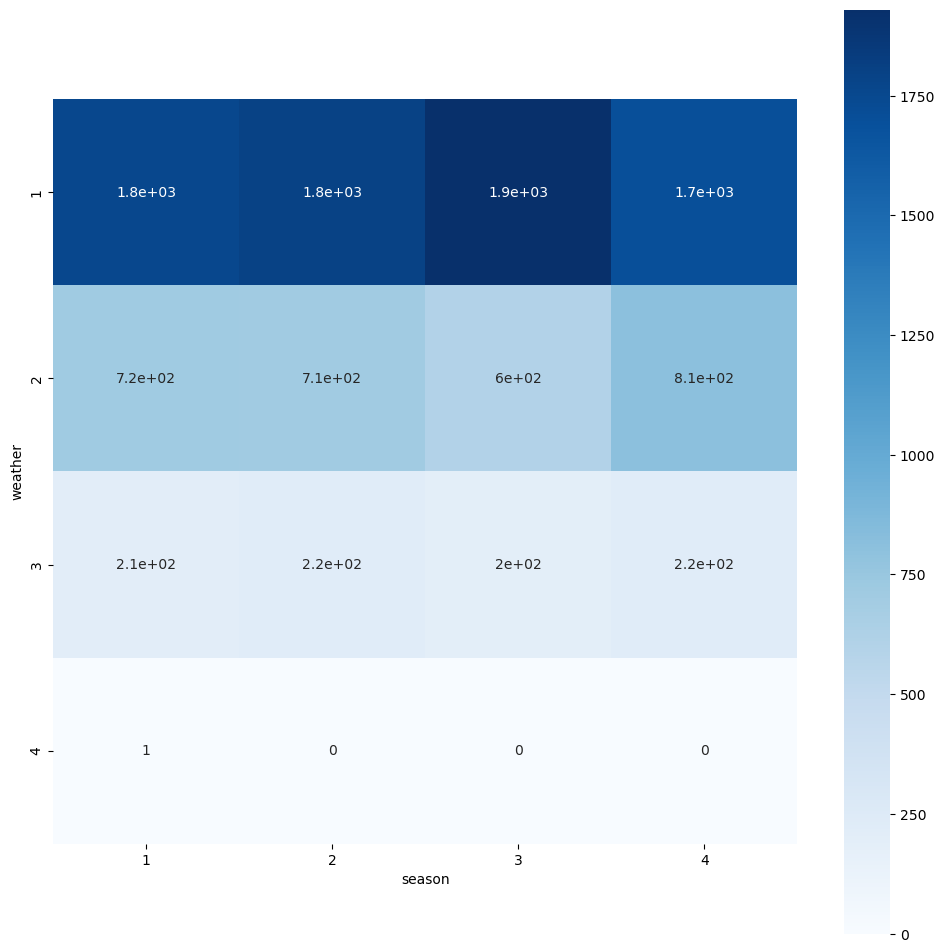

In [104]:
plt.figure(figsize=(12, 12))
sns.heatmap(cont, square=True,annot=True, cmap="Blues")

In [105]:
# calculating test statistic
chi_stat, p, dof, expected=chi2_contingency(cont.values) 

In [106]:
p

np.float64(1.5499250736864862e-07)

In [107]:
p<alpha

np.True_

In [108]:
###

In [109]:
#2 ANNOVa test

In [110]:
# Test: To check if No. of cycles rented is similar or different 1. weather 2. seasons

In [111]:
#2.1 To check if No. of cycles rented is similar or different weather 

In [112]:
# Normality check


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

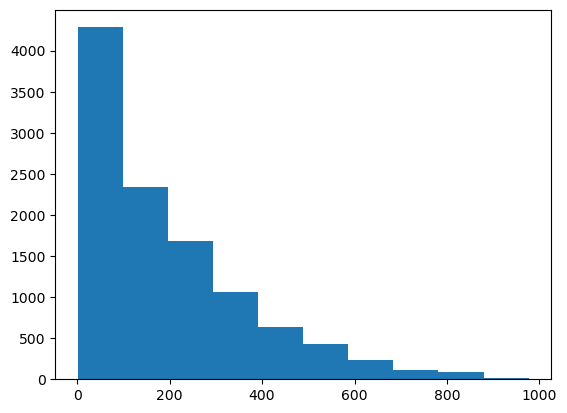

In [113]:
plt.hist(df['count'])

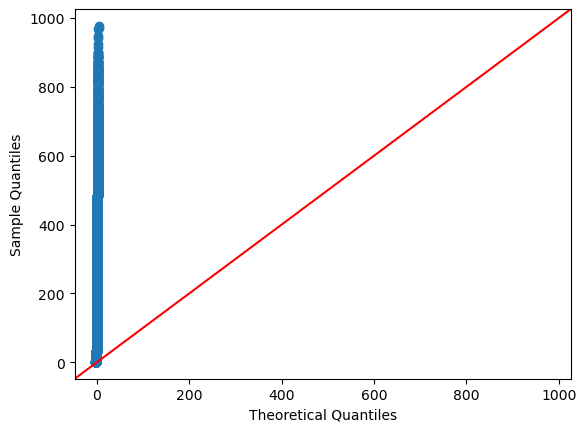

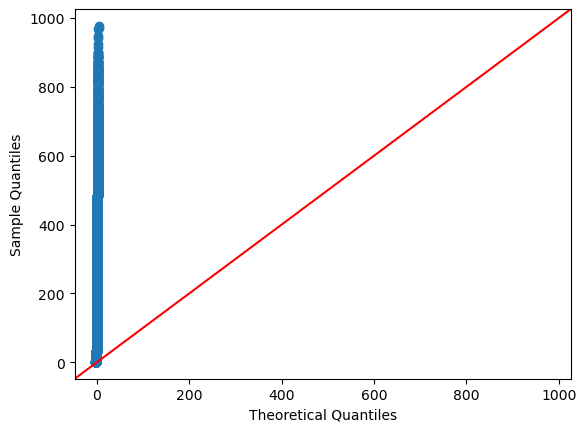

In [114]:
# Create Q-Q plot of residuals
import statsmodels.api as sm
sm.qqplot(df['count'], line='45')

In [115]:
# normality test violated

In [116]:
# Shapiro-Wilk Test for Normality
from scipy.stats import shapiro
shapiro(df['count'])

C:\Users\soheb\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.8783658962690556), pvalue=np.float64(5.369837893115507e-68))

In [117]:
# normality test violated

In [118]:
# Set the significance level
alpha=0.05

In [119]:
# visual analysis

<Axes: xlabel='weather', ylabel='count'>

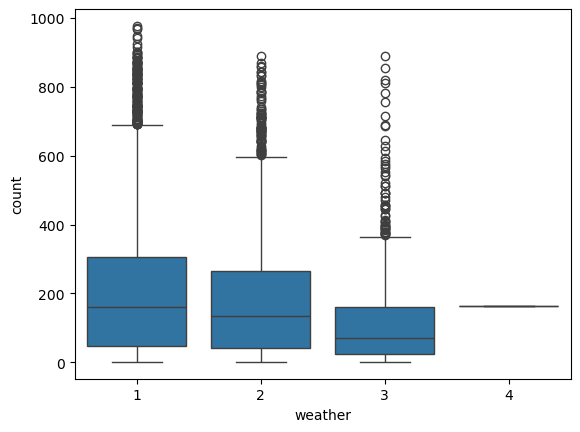

In [120]:
sns.boxplot(x='weather', y='count', data=df)

In [121]:
weather_1=df[df['weather']==1]['count']
weather_2=df[df['weather']==2]['count']
weather_3=df[df['weather']==3]['count']
weather_4=df[df['weather']==4]['count']

In [122]:
# F-statistics test
f_stat, p_value =f_oneway(weather_1,weather_2,weather_3)

In [123]:
p_value

np.float64(4.976448509904196e-43)

In [124]:

p_value<alpha

np.True_

In [125]:
#2.2 To check if No. of cycles rented is similar or different season

In [126]:
# Set the significance level
alpha=0.05

In [127]:
# visual analysis

<Axes: xlabel='season', ylabel='count'>

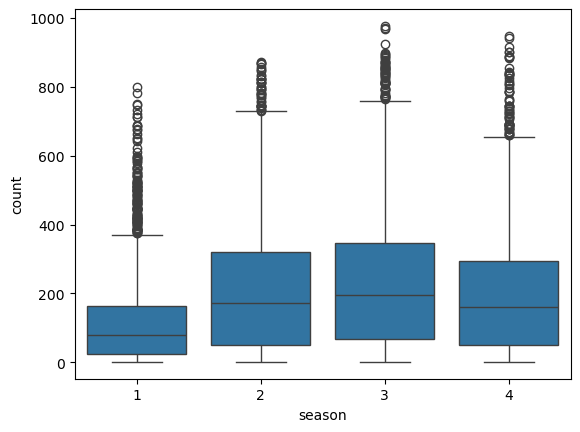

In [128]:
sns.boxplot(x='season', y='count', data=df)

In [129]:
season_1=df[df['season']==1]['count']
season_2=df[df['season']==2]['count']
season_3=df[df['season']==3]['count']
season_4=df[df['season']==4]['count']

In [130]:
# F-statistics test
f_stat, p_value =f_oneway(season_1,season_2,season_3,season_4)

In [131]:

p_value<alpha

np.True_

In [134]:
#

In [135]:
#3.  2-sample ttest to check if working day has the effect on the number of electric vehicles rented

In [136]:
# Set the null and alternate hypothesis
#H0: mu1=mu2
#H1: mu1!=mu2

In [137]:
# check for normality

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

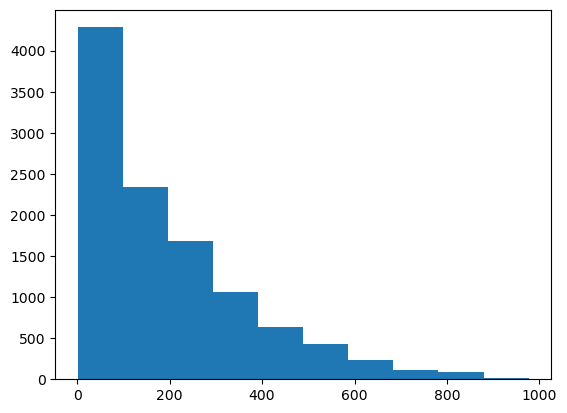

In [138]:
plt.hist(df['count'])

In [139]:
sample_1=df[df['workingday']==1]['count']
sample_2=df[df['workingday']==0]['count']

In [140]:
len(sample_1)

7412

In [141]:
len(sample_2)

3474

In [142]:
# we ignore the normality condition because the sample sizes are quite big

In [143]:
# levine test for variance

In [144]:
stats.levene(sample_1,sample_2,center='mean')

LeveneResult(statistic=np.float64(0.9606739790242115), pvalue=np.float64(0.3270389131557905))

In [145]:
# pvalue>0.05
# so both the groups have the same variance

In [146]:
# all assumptions are satisfied

In [147]:
# significance level
alpha=0.05

In [148]:
# visual analysis

<Axes: xlabel='workingday', ylabel='count'>

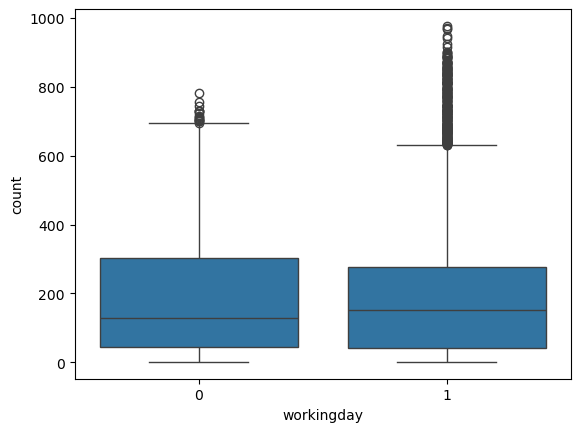

In [149]:
sns.boxplot(x='workingday', y='count', data=df)

(array([2797., 1682., 1269.,  672.,  387.,  254.,  154.,   94.,   84.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

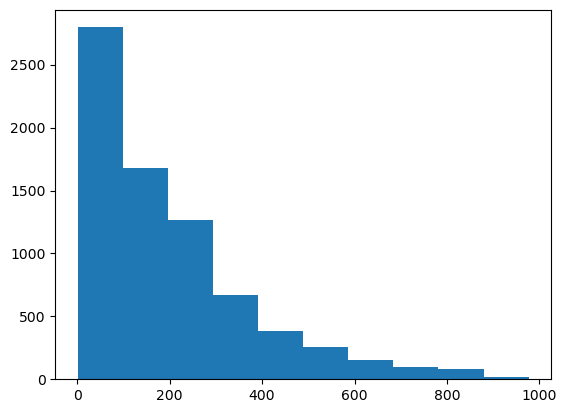

In [150]:
plt.hist(sample_1)

(array([1296.,  623.,  411.,  312.,  312.,  214.,  144.,   94.,   57.,
          11.]),
 array([  1. ,  79.2, 157.4, 235.6, 313.8, 392. , 470.2, 548.4, 626.6,
        704.8, 783. ]),
 <BarContainer object of 10 artists>)

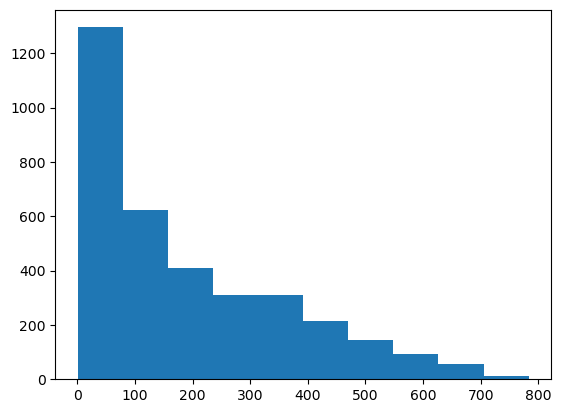

In [151]:
plt.hist(sample_2)

In [152]:
# Calculating test statistic
tstat,pvalue=stats.ttest_ind(sample_1,sample_2)

In [153]:
pvalue<alpha

np.False_

In [154]:
# additional

In [155]:
## Q: Does month affect the bike rentals?

In [156]:
df_copy=df.copy()

In [157]:
df_copy['datetime']=pd.to_datetime(df_copy['datetime'])

In [158]:
df_copy['month']=df_copy['datetime'].dt.month

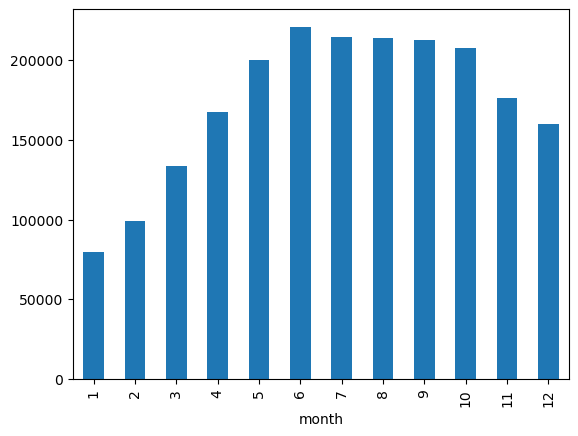

In [159]:
df_copy.groupby('month')['count'].sum().plot(kind='bar')
plt.show()

In [160]:
df_copy.groupby('month')['count'].mean().idxmax()

np.int32(6)

In [161]:
df_copy.groupby('month')['count'].mean().idxmin()

np.int32(1)

In [162]:
# Typical indian months of year and its respective seasons

In [163]:
# Q: Does different weather condition has effect on the total bikes rented

C:\Users\soheb\AppData\Local\Temp\ipykernel_11620\2047417440.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('weather')['count'].sum().plot(kind='bar')


<Axes: xlabel='weather'>

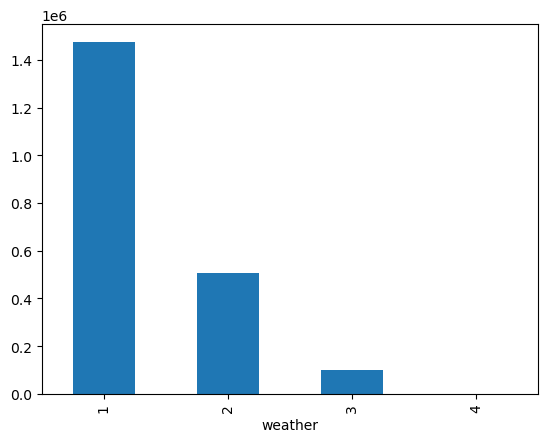

In [164]:
df.groupby('weather')['count'].sum().plot(kind='bar')

In [165]:
# Q: Does different seaons has effect on the total bikes rented

C:\Users\soheb\AppData\Local\Temp\ipykernel_11620\1260756279.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('season')['count'].sum().plot(kind='bar')


<Axes: xlabel='season'>

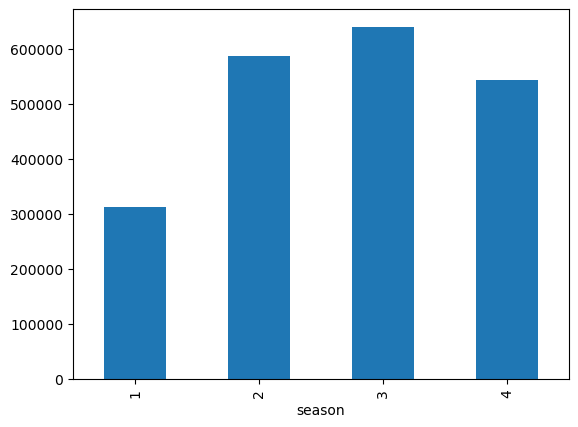

In [166]:
df.groupby('season')['count'].sum().plot(kind='bar')

In [167]:
# Does the rentals in the cold months affected by windspeed?(ignore this if you think this is not relevant)

In [168]:
df_copy[df_copy['month'].isin([1,2,3])]['windspeed'].mean()

np.float64(14.636978145941919)

In [169]:
df_copy[~df_copy['month'].isin([1,2,3])]['windspeed'].mean()

np.float64(12.197475012195124)

In [170]:
##